## study_gan.ipynb
#### [GAN 강의자료_Tensorflow](https://www.tensorflow.org/tutorials/generative/dcgan)
#### [자세한 GAN 참조](http://introtodeeplearning.com/)


In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-a75bec62-f416-2dd9-5323-99f6bf231ce7)


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape, type(x_train), x_train.ndim, y_train.shape, type(y_train), y_train.ndim

((60000, 28, 28), numpy.ndarray, 3, (60000,), numpy.ndarray, 1)

12960
8


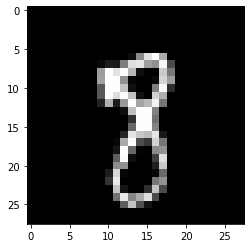

In [5]:
i = np.random.randint(0, 60000)  # 0 ~ 59,999
print(i)
print(y_train[i])
plt.imshow(x_train[i], cmap="gray")

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32")

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_train[0].min(), x_train[0].max()

(0.0, 255.0)

In [9]:
x_train = x_train / 255

In [10]:
def build_generator():
    network = tf.keras.Sequential()

    network.add(layers.Dense(7 * 7 * 256, use_bias = False, input_shape = (100, )))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    network.add(layers.Reshape((7, 7, 256)))

    # 7 * 7 * 128
    network.add(layers.Conv2DTranspose(128, (5, 5), padding="same", use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # 14 * 14 * 64
    network.add(layers.Conv2DTranspose(64, (5, 5), strides = (2, 2), padding="same", use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # 28 * 28 * 1
    network.add(layers.Conv2DTranspose(1, (5, 5), strides = (2, 2), padding="same", use_bias=False, activation="tanh"))

    network.summary()

    return network

In [11]:
generator = build_generator()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

In [12]:
noise = tf.random.normal([1, 100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.14007773, -0.42776152,  0.23754855, -1.5352212 , -1.1358138 ,
        -0.75232023, -0.30666995, -0.0972615 , -0.6818035 ,  0.959999  ,
         1.5563494 ,  0.7766168 ,  0.19606055,  1.125974  ,  0.81872106,
        -0.14609586,  0.40344906,  1.400282  ,  0.3216383 , -1.7250822 ,
         0.11436848,  0.358783  , -0.5057997 , -0.44425416, -0.7303842 ,
        -0.13778834,  0.16134948, -0.3914206 , -1.30626   ,  1.9522325 ,
        -0.53023416, -0.1786791 , -2.1995988 ,  1.0966723 ,  0.41598463,
         1.1603984 , -0.651228  ,  0.7258521 ,  0.8922021 ,  1.1202801 ,
         1.0681015 ,  0.1358095 ,  0.04591042, -0.6964477 , -0.0046347 ,
        -1.1801847 , -1.4816694 , -1.6482126 , -0.42526692, -0.675406  ,
         1.2188231 , -0.40523642, -0.46711668,  0.403585  , -0.98503435,
        -0.04028143, -0.26404223, -1.1947575 ,  0.5858615 , -1.3112215 ,
        -0.34887463,  1.08269   ,  1.6680005 ,  0.6876014 , -2.241723  ,
 

(1, 28, 28, 1)


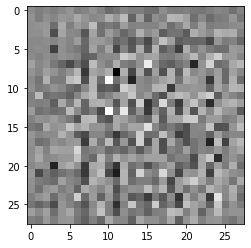

In [13]:
generated_image = generator(noise, training = False)
print(generated_image.shape)
plt.imshow(generated_image[0,:, :,0], cmap="gray")

In [14]:
def build_discriminator():
    network = tf.keras.Sequential()

    # 14 * 14 * 64
    network.add(layers.Conv2D(64, (5, 5), strides = (2, 2), padding="same", input_shape = [28, 28, 1]))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    # 7 * 7 * 128
    network.add(layers.Conv2D(128, (5, 5), strides = (2, 2), padding="same"))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))    

    network.add(layers.Flatten())
    network.add(layers.Dense(1))

    network.summary()

    return network

In [15]:
discriminator = build_discriminator()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [16]:
discriminator(generated_image, training=False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.0012474]], dtype=float32)>

In [17]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [18]:
def discriminator_loss(expected_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


In [19]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [20]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)

In [21]:
epochs = 100
noise_dim = 100
num_images_to_generate = 16
batch_size = 256

In [22]:
@tf.function
def train_steps(images):
    noise = tf.random.normal([batch_size, noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training = True)
        
        expected_output = discriminator(images, training =True)
        fake_output = discriminator(generated_images, training = True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(expected_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients( zip(gradients_of_generator, generator.trainable_variables) )
    discriminator_optimizer.apply_gradients( zip(gradients_of_discriminator, discriminator.trainable_variables) )



In [23]:
def train(dataset, epochs, test_images):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_steps(image_batch)

        print("Epoch: ", epoch + 1)
        generated_images = generator(test_images, training = False)
        fig = plt.figure(figsize = (10, 10))
        for i in range(generated_images.shape[0]):
            plt.subplot(4, 4, i + 1)
            plt.imshow(generated_images[i, :, :, 0], cmap="gray")
            plt.axis("off")
        plt.show()

        

In [24]:
test_images = tf.random.normal([num_images_to_generate, noise_dim])

In [25]:
test_images.shape, type(test_images), test_images.ndim, test_images

(TensorShape([16, 100]),
 tensorflow.python.framework.ops.EagerTensor,
 2,
 <tf.Tensor: shape=(16, 100), dtype=float32, numpy=
 array([[-0.9606519 ,  1.2565861 , -1.1678336 , ...,  2.1910229 ,
         -1.2501876 ,  0.26887968],
        [-0.4820527 ,  1.7873689 , -0.87767553, ...,  1.0133537 ,
         -0.3358907 , -0.661478  ],
        [ 1.3261913 , -0.6215299 , -2.1673474 , ..., -1.3205165 ,
          0.5898817 ,  1.2333827 ],
        ...,
        [-0.2097393 ,  0.1426281 ,  0.95635265, ..., -1.1284128 ,
         -0.6370325 ,  0.03057419],
        [ 0.13014579,  1.2476852 , -1.22461   , ..., -0.04703096,
         -0.41529956,  0.23576498],
        [-2.3418734 ,  1.672137  , -1.6552473 , ..., -0.6425271 ,
         -0.14706932, -0.16706797]], dtype=float32)>)

In [26]:
x_train.shape, type(x_train)

((60000, 28, 28, 1), numpy.ndarray)

In [27]:
x_train = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(256)

In [28]:
type(x_train), x_train

(tensorflow.python.data.ops.dataset_ops.BatchDataset,
 <BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>)

Epoch:  1


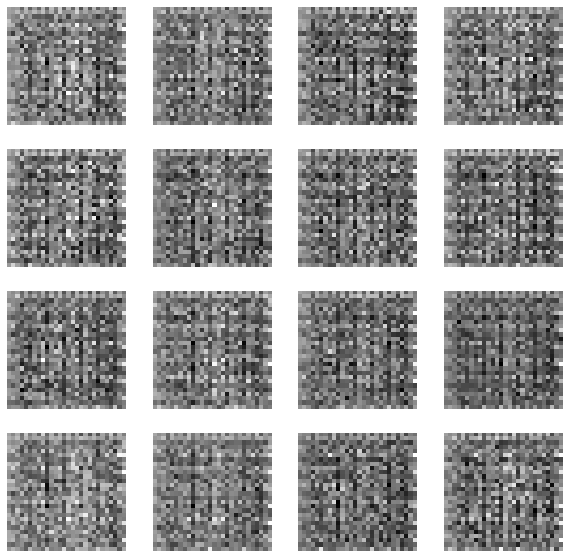

Epoch:  2


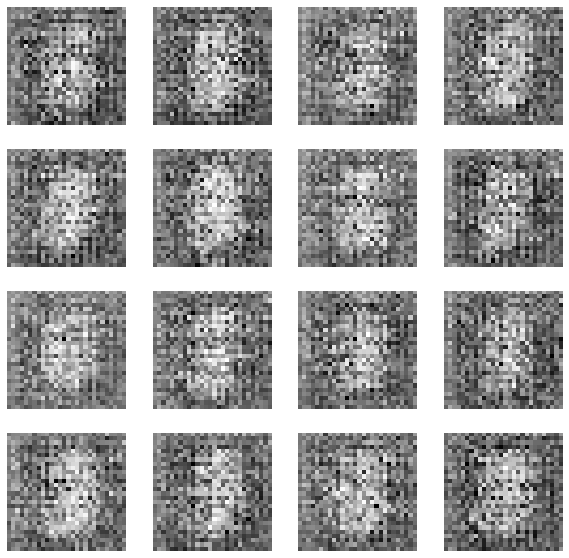

Epoch:  3


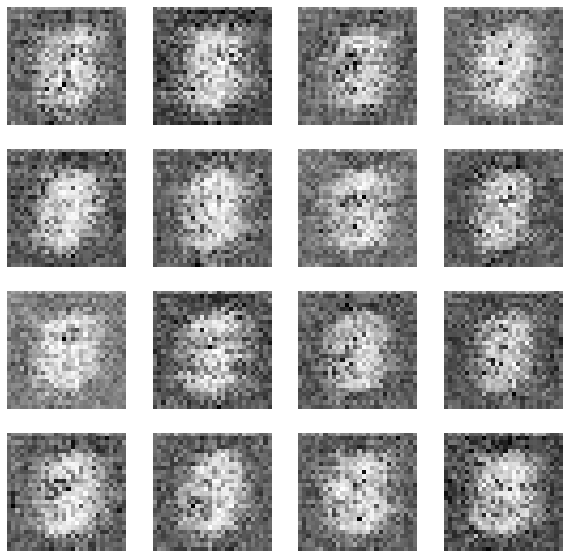

Epoch:  4


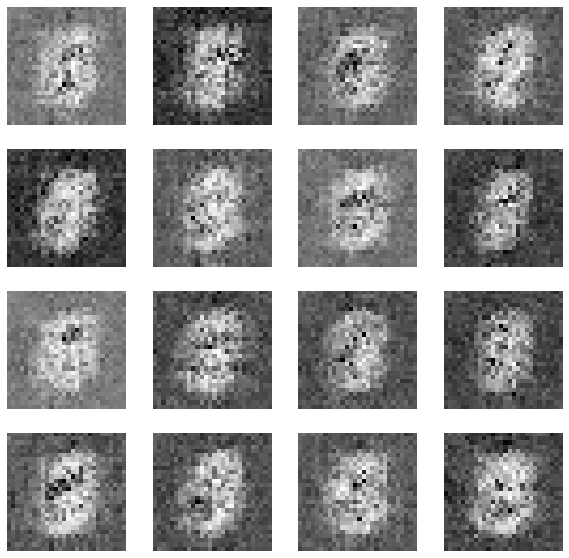

Epoch:  5


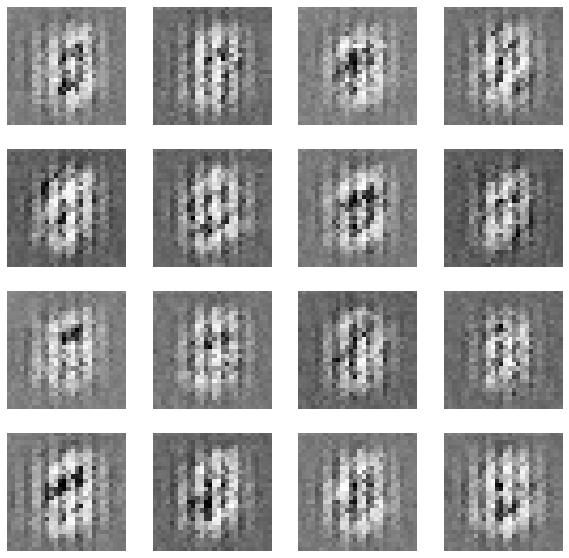

Epoch:  6


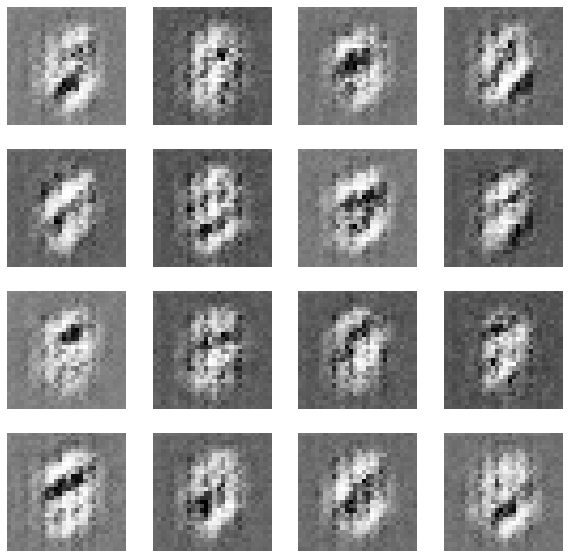

Epoch:  7


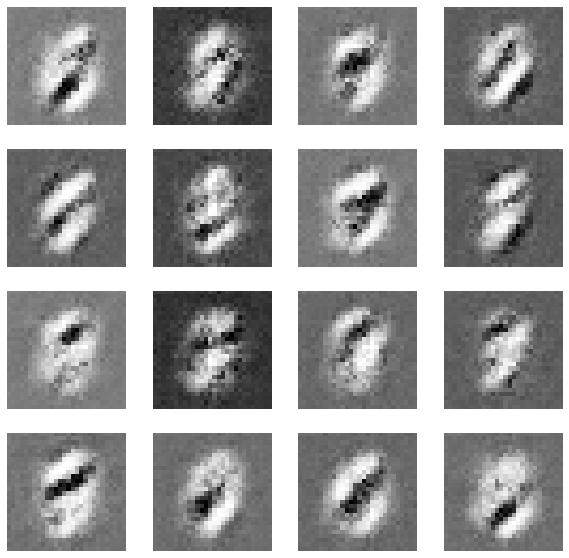

Epoch:  8


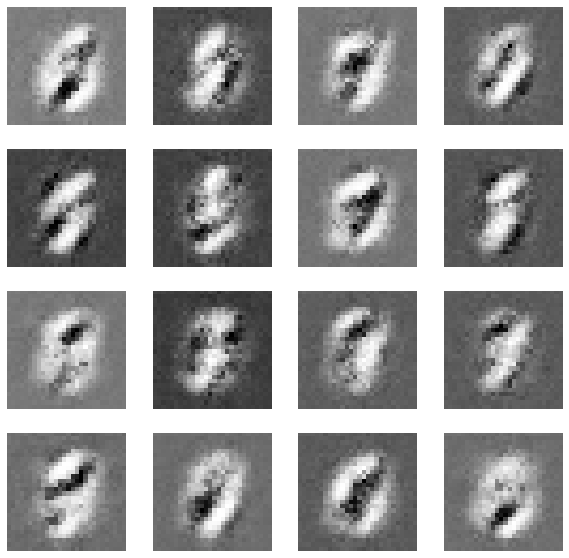

Epoch:  9


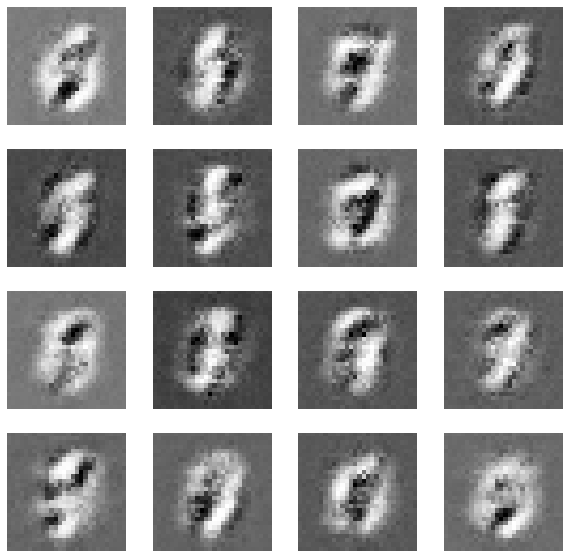

Epoch:  10


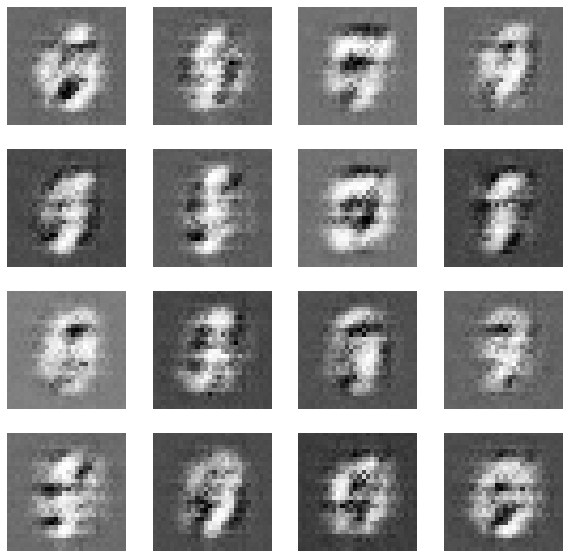

Epoch:  11


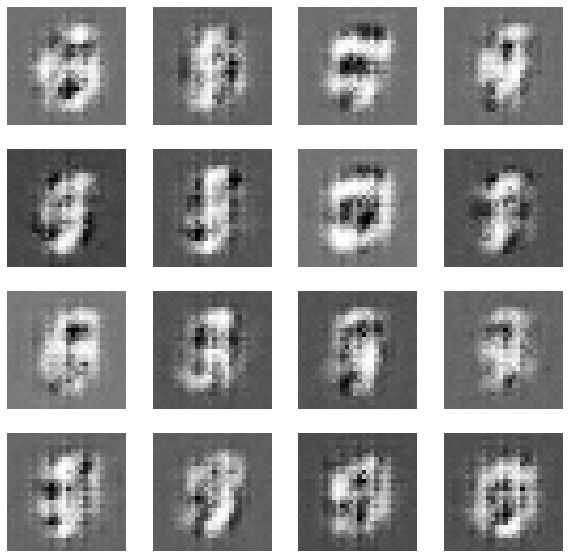

Epoch:  12


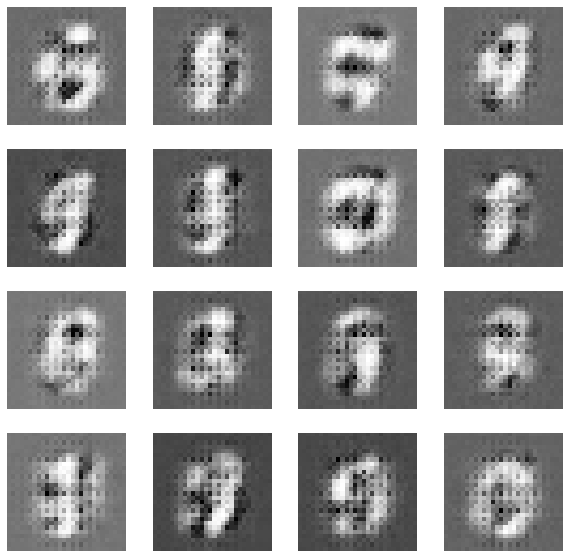

Epoch:  13


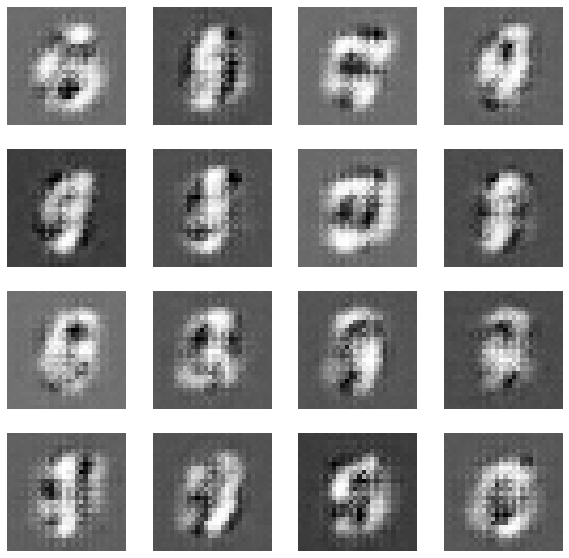

Epoch:  14


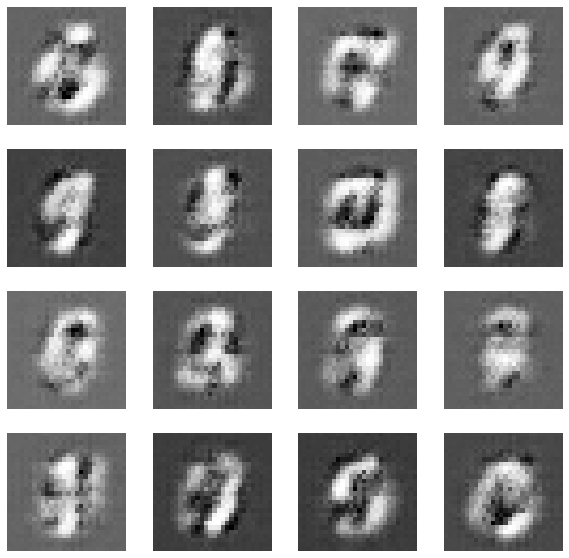

Epoch:  15


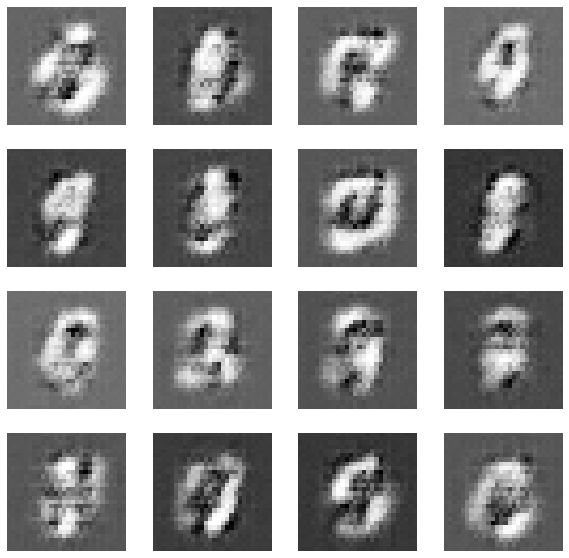

Epoch:  16


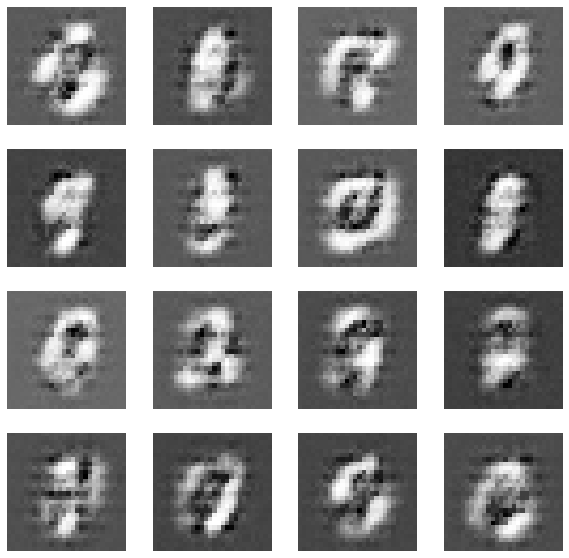

Epoch:  17


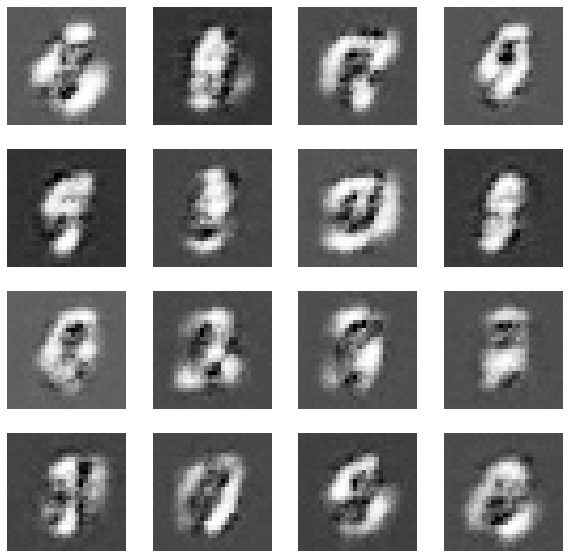

Epoch:  18


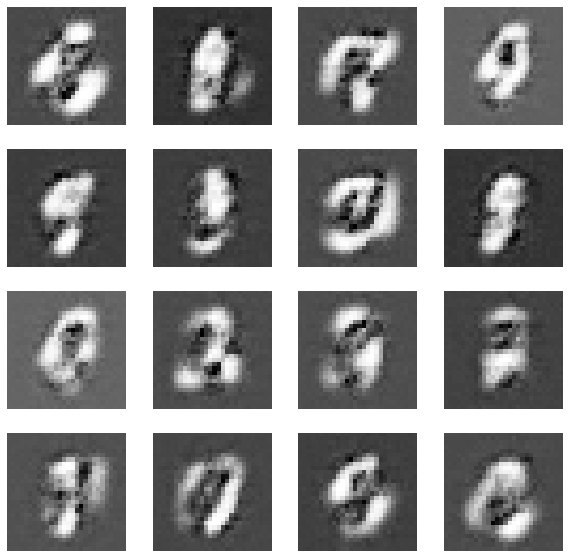

Epoch:  19


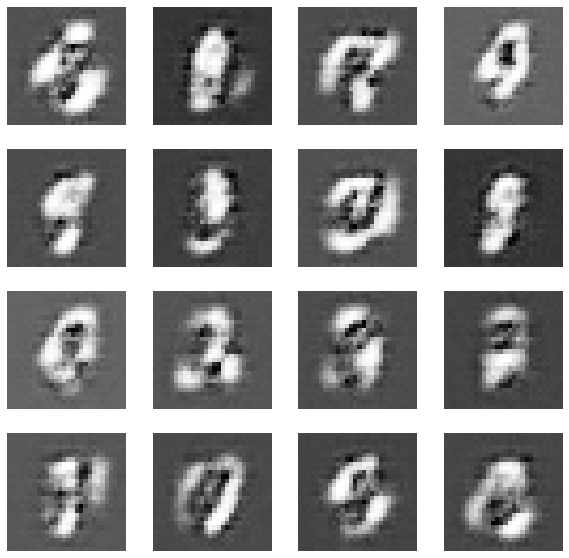

Epoch:  20


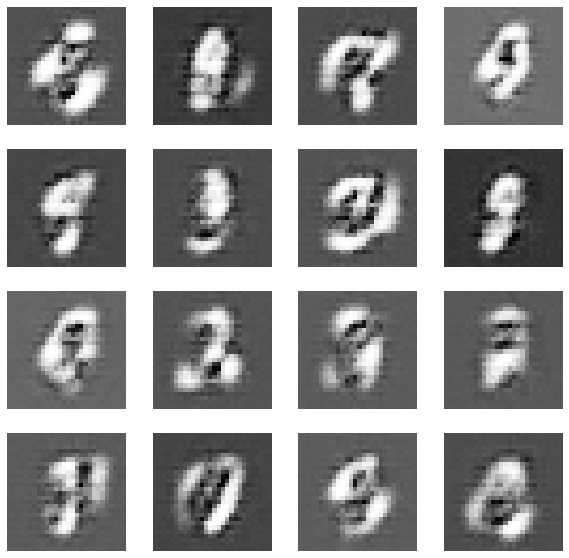

Epoch:  21


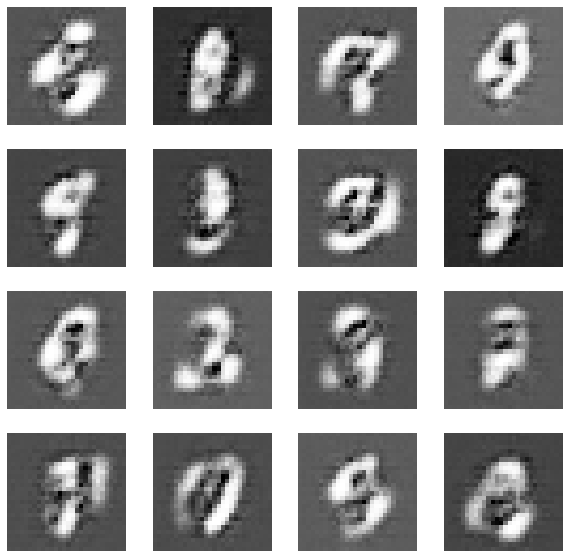

Epoch:  22


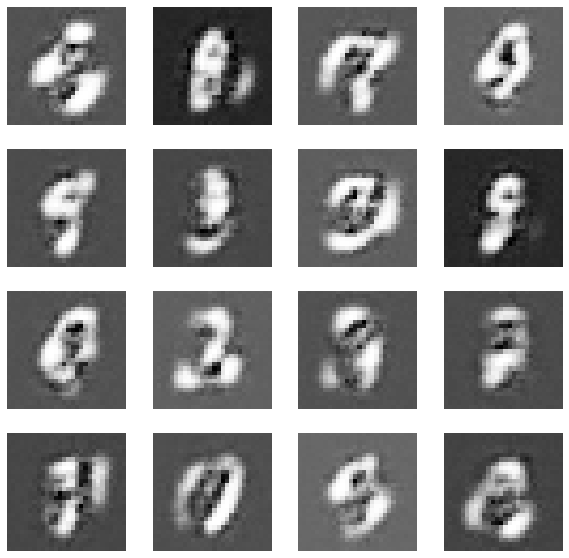

Epoch:  23


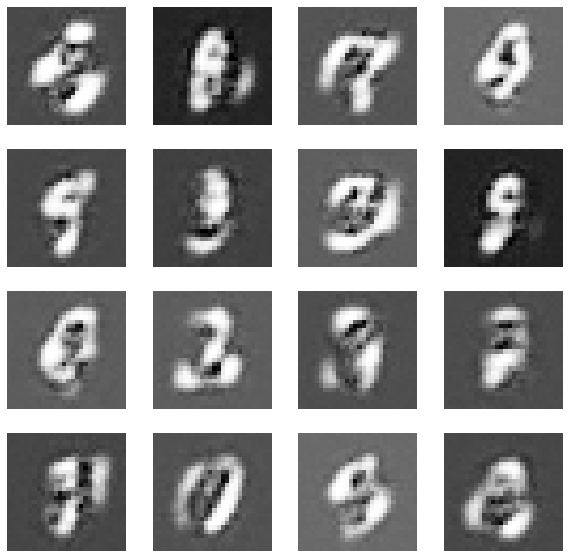

Epoch:  24


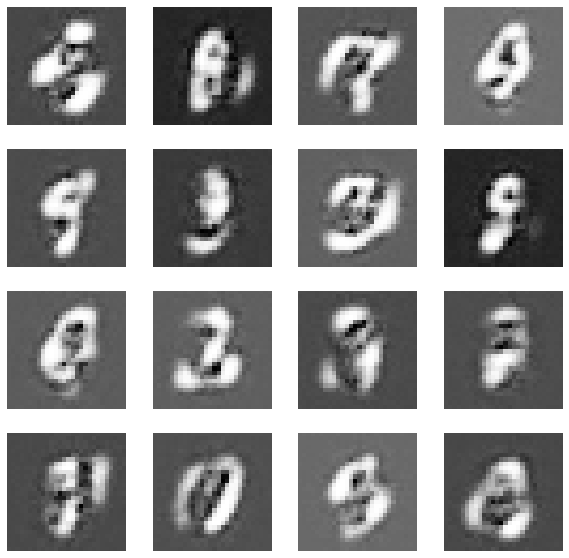

Epoch:  25


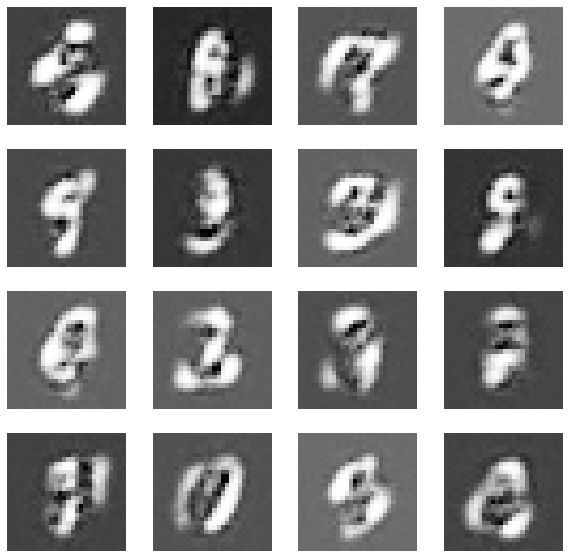

Epoch:  26


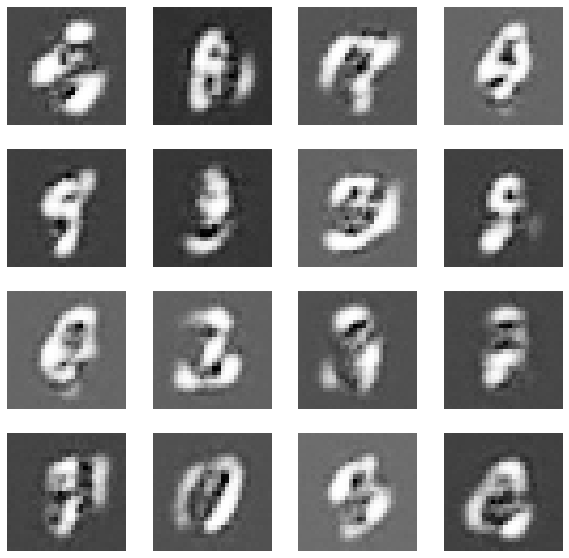

Epoch:  27


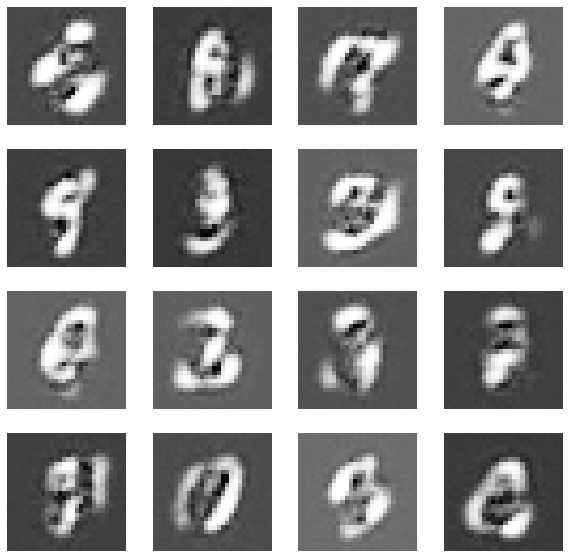

Epoch:  28


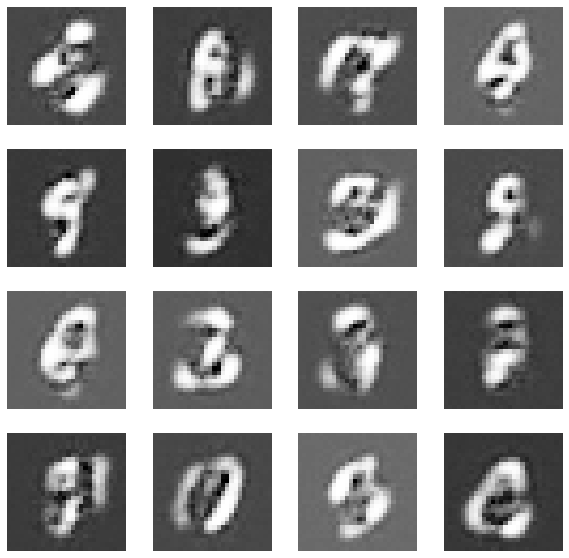

Epoch:  29


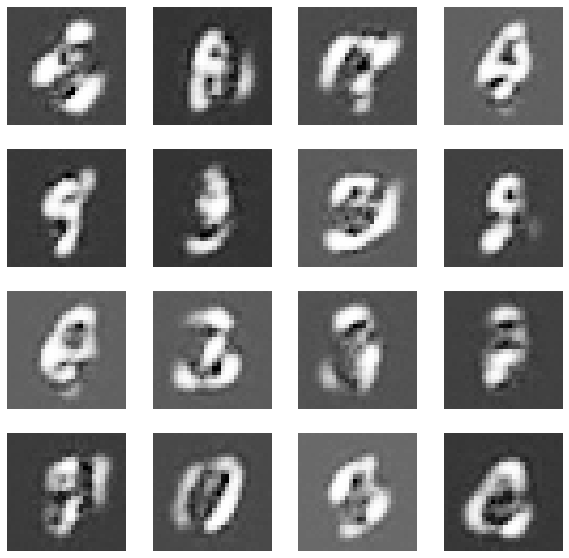

Epoch:  30


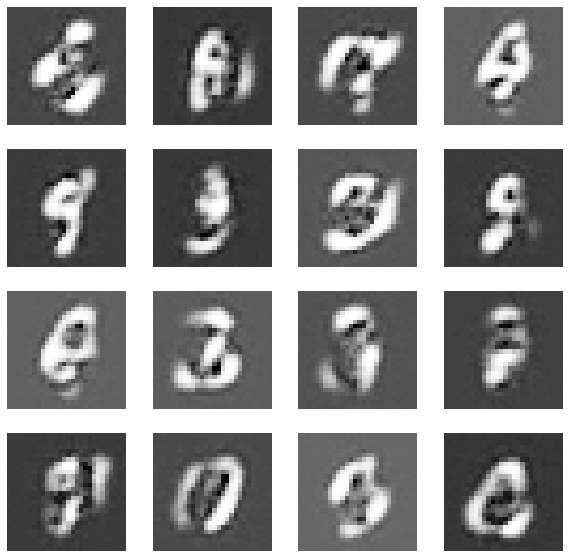

Epoch:  31


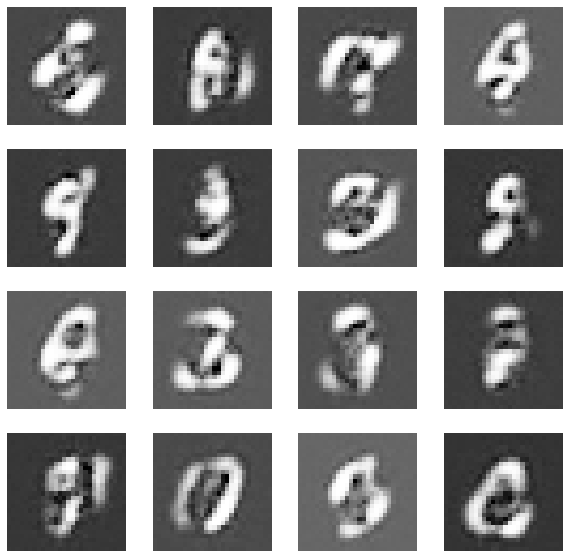

Epoch:  32


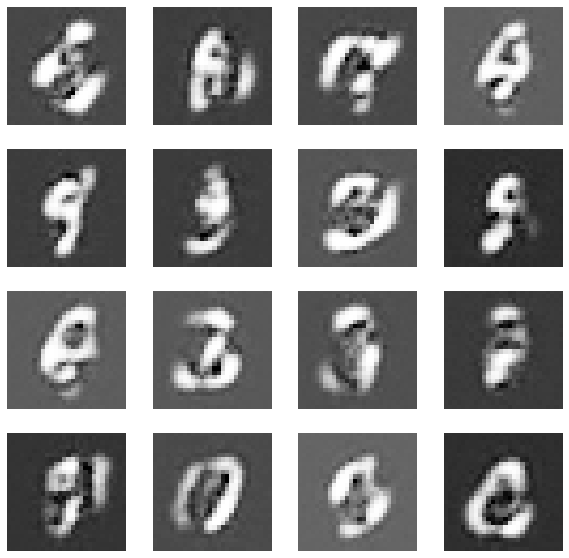

Epoch:  33


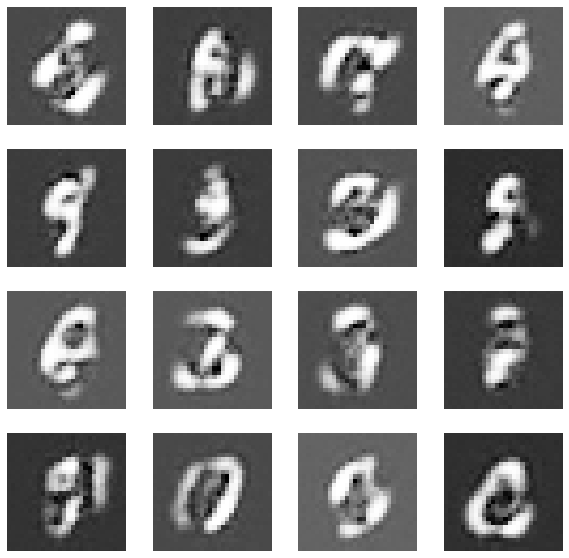

Epoch:  34


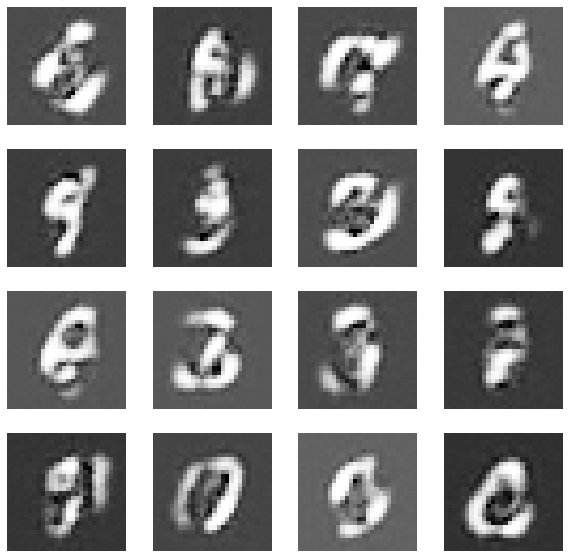

Epoch:  35


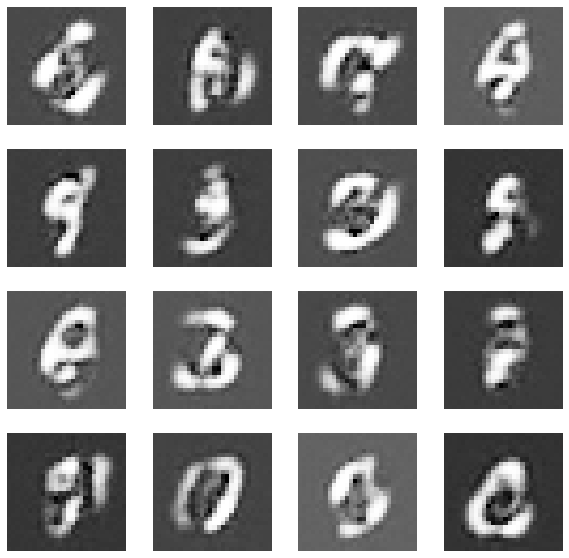

Epoch:  36


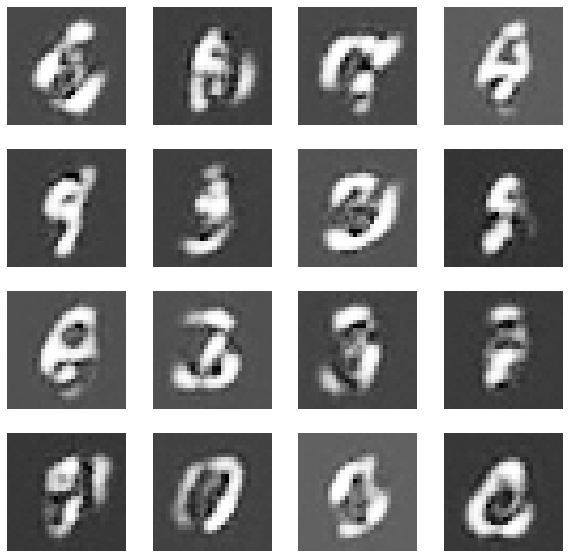

Epoch:  37


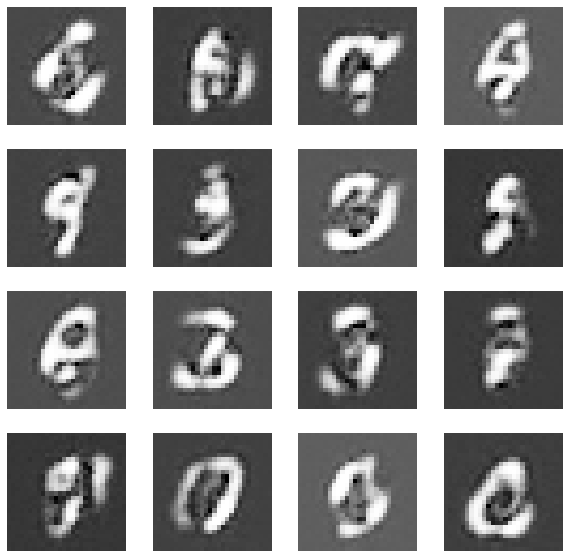

Epoch:  38


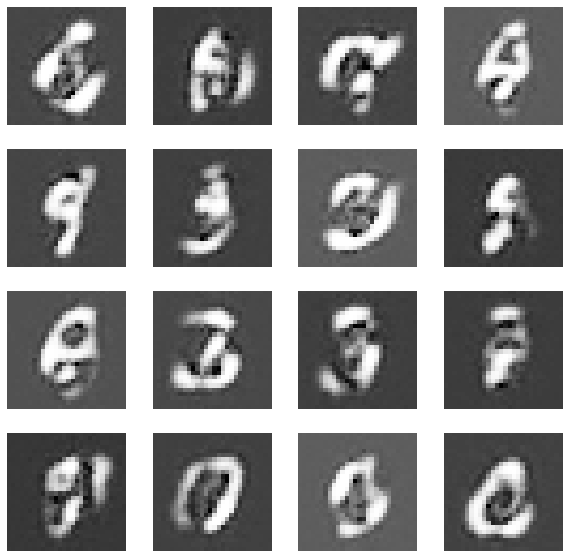

Epoch:  39


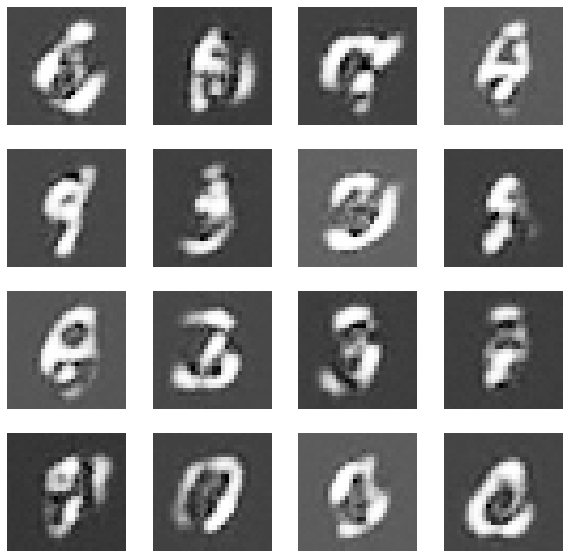

Epoch:  40


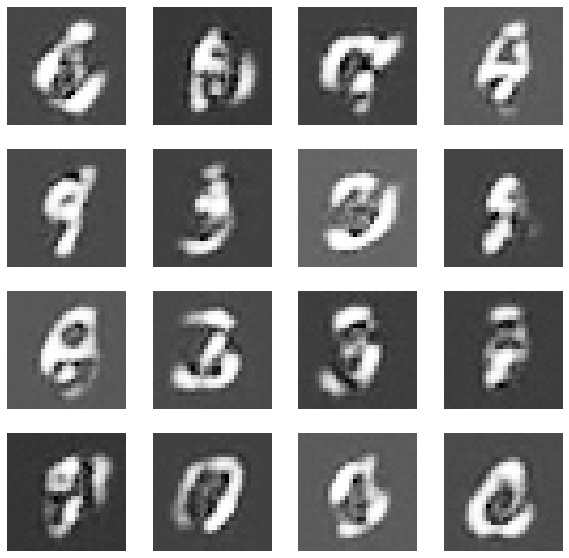

Epoch:  41


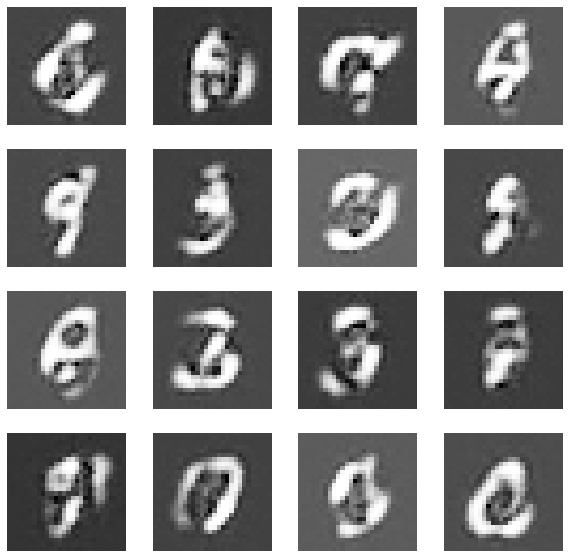

Epoch:  42


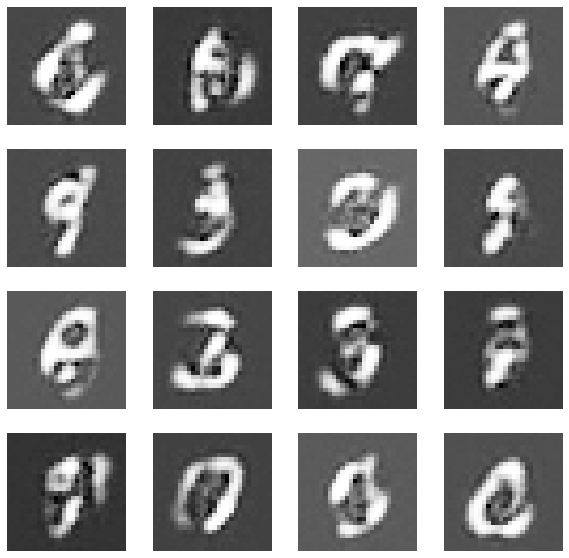

Epoch:  43


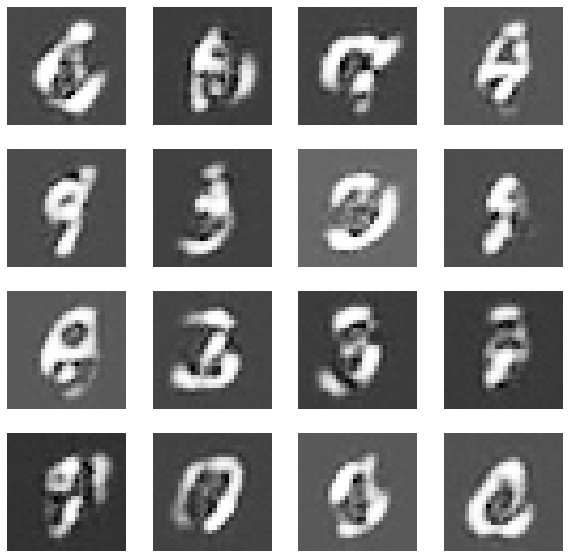

Epoch:  44


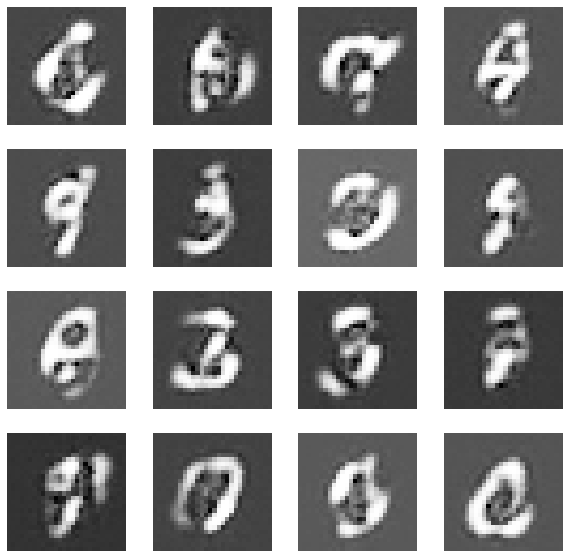

Epoch:  45


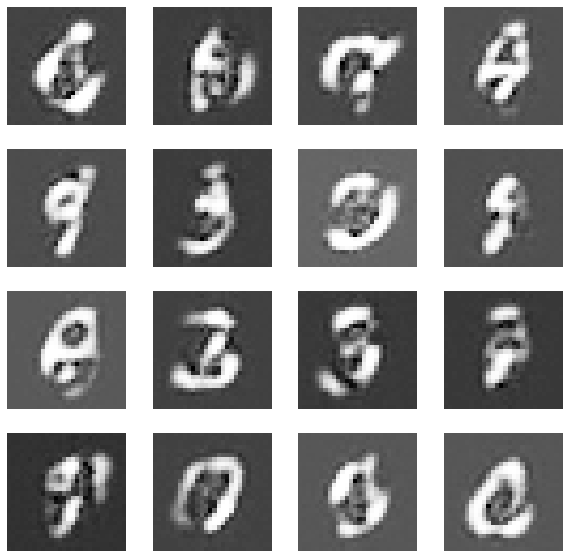

Epoch:  46


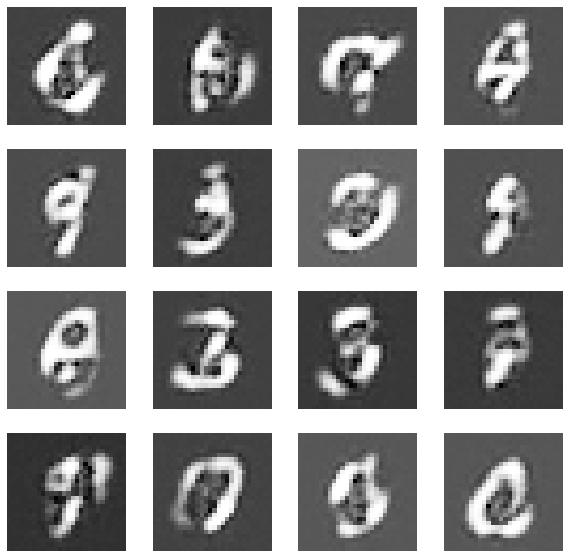

Epoch:  47


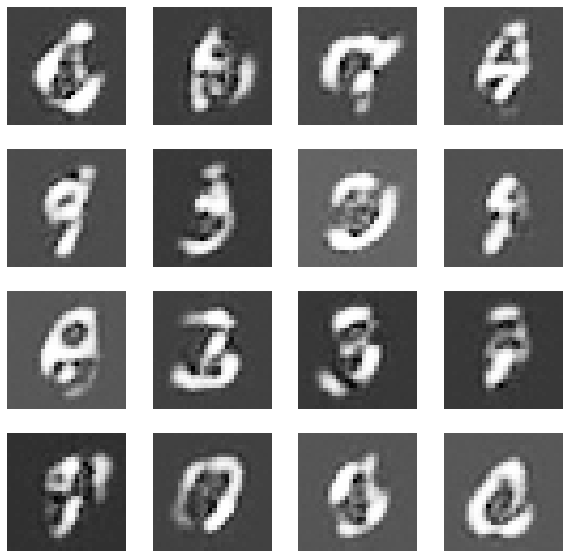

Epoch:  48


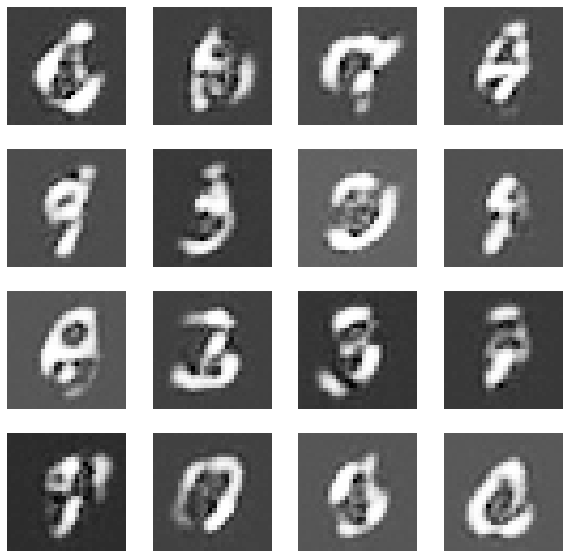

Epoch:  49


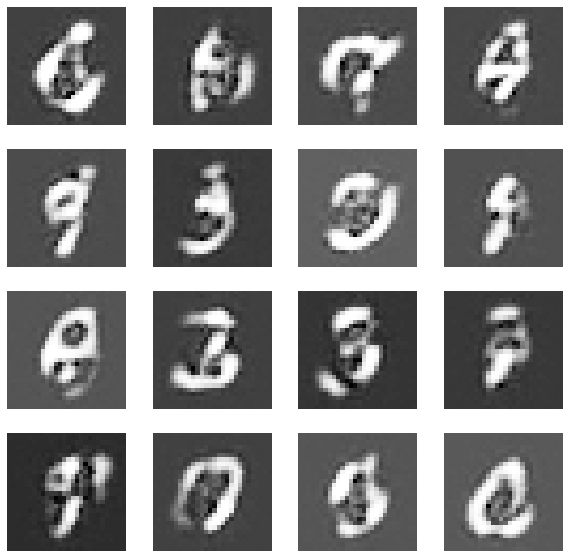

Epoch:  50


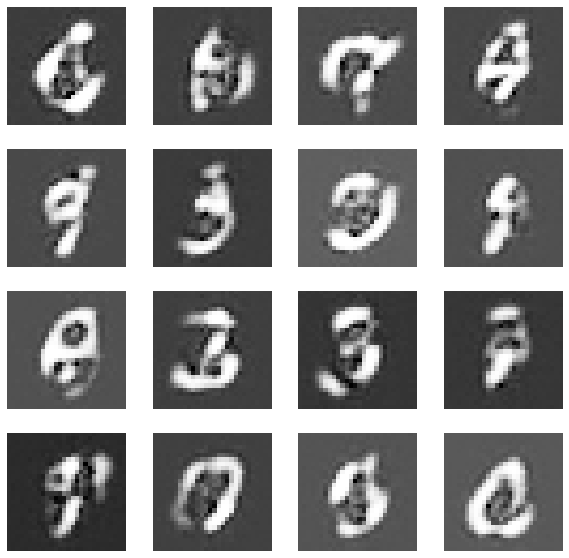

Epoch:  51


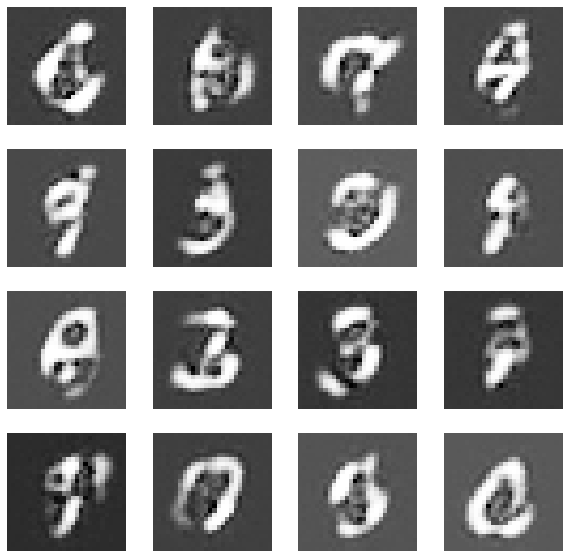

Epoch:  52


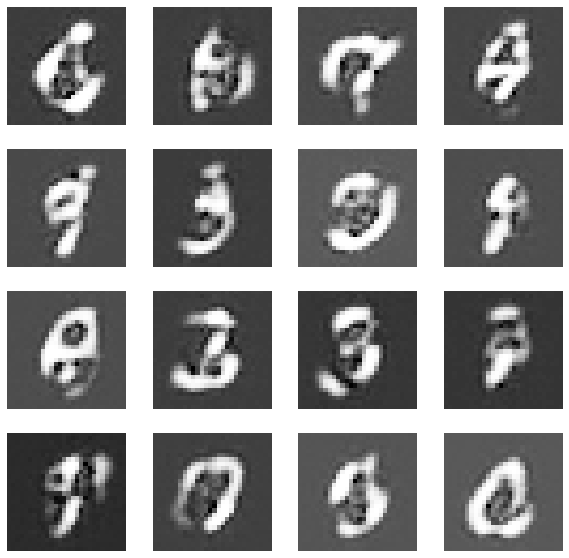

Epoch:  53


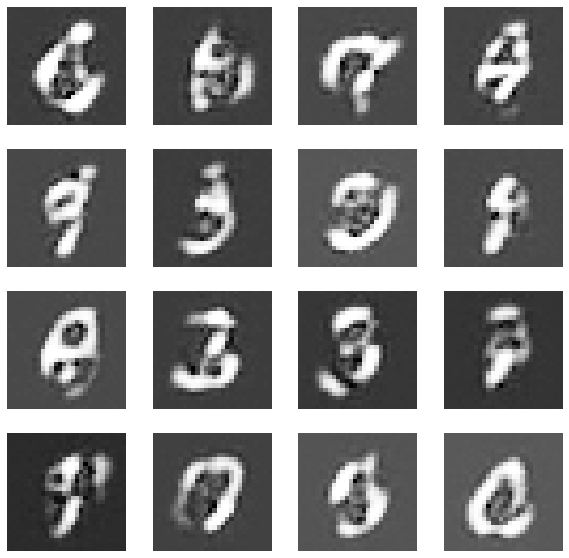

Epoch:  54


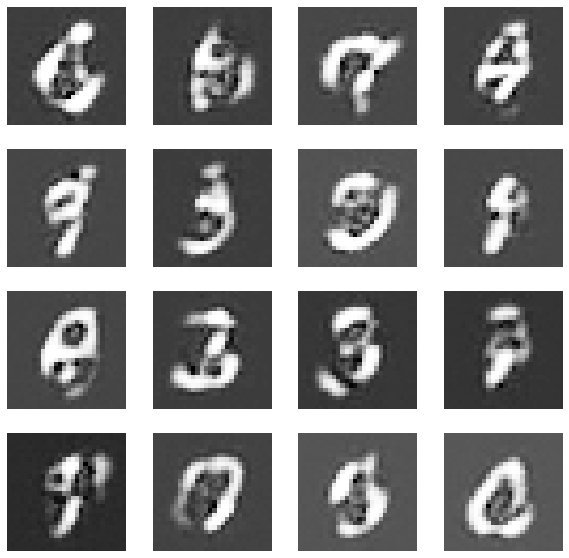

Epoch:  55


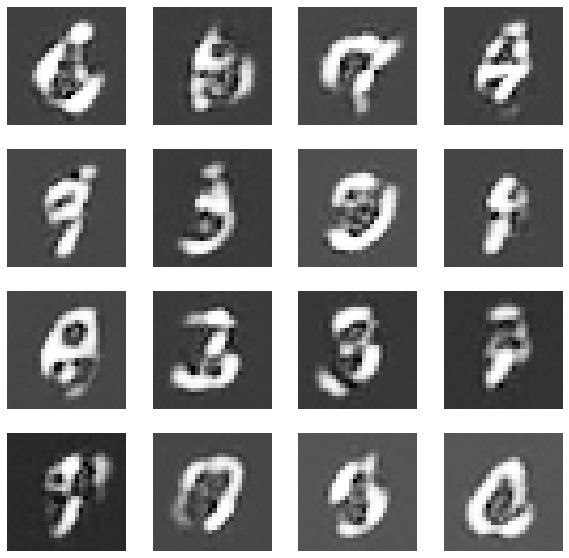

Epoch:  56


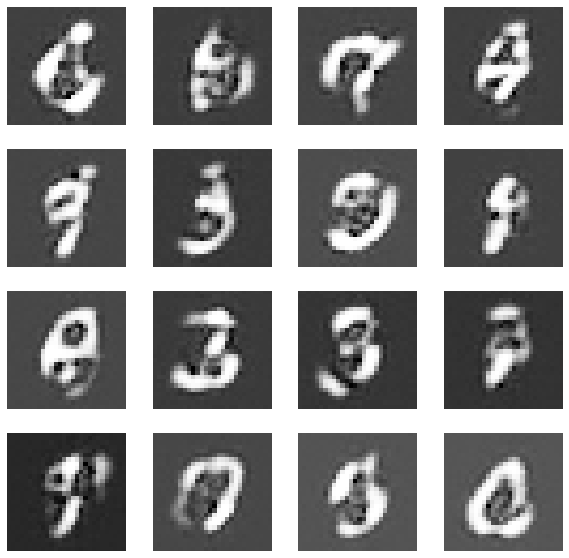

Epoch:  57


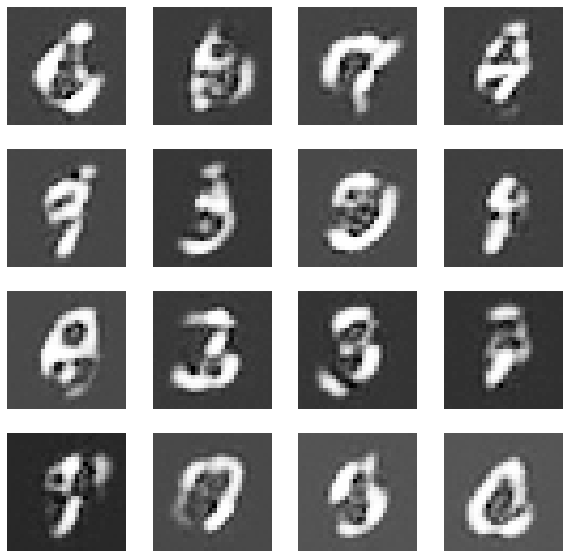

Epoch:  58


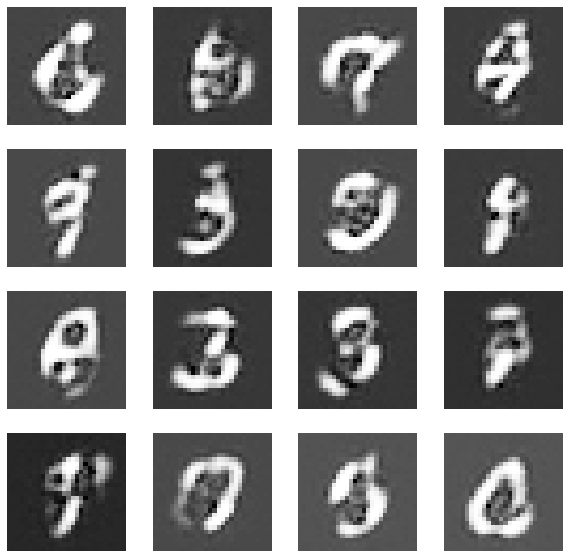

Epoch:  59


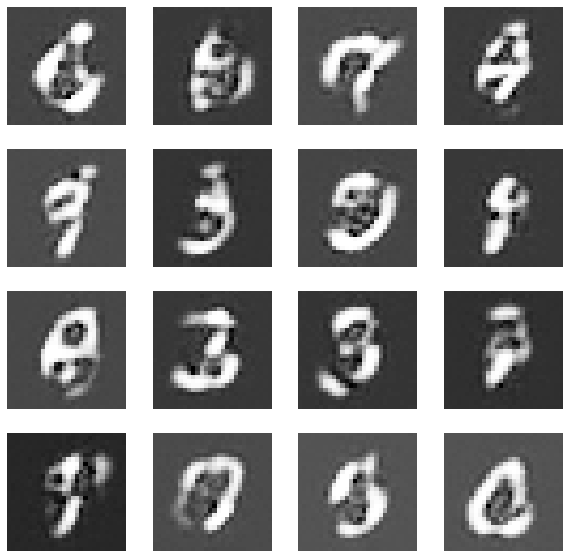

Epoch:  60


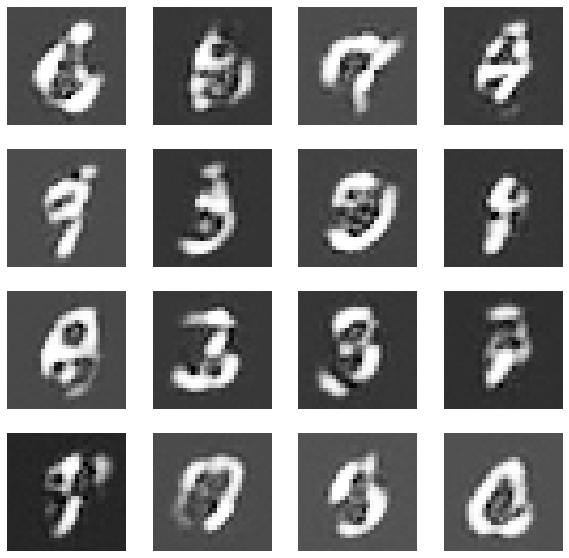

Epoch:  61


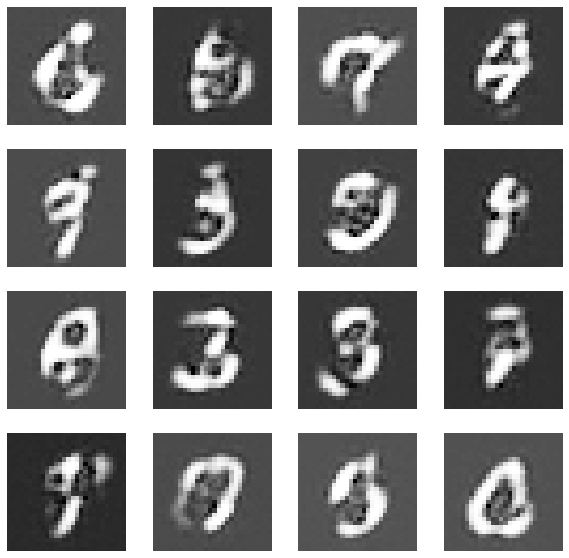

Epoch:  62


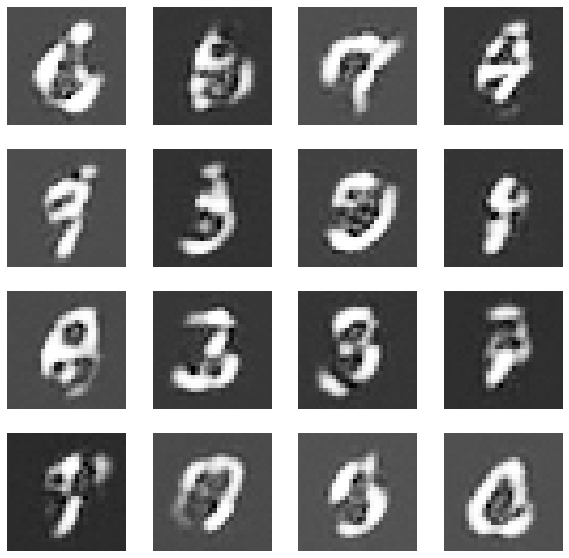

Epoch:  63


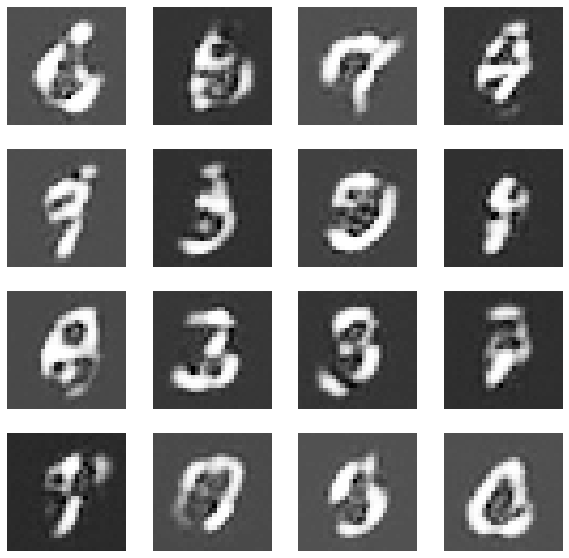

Epoch:  64


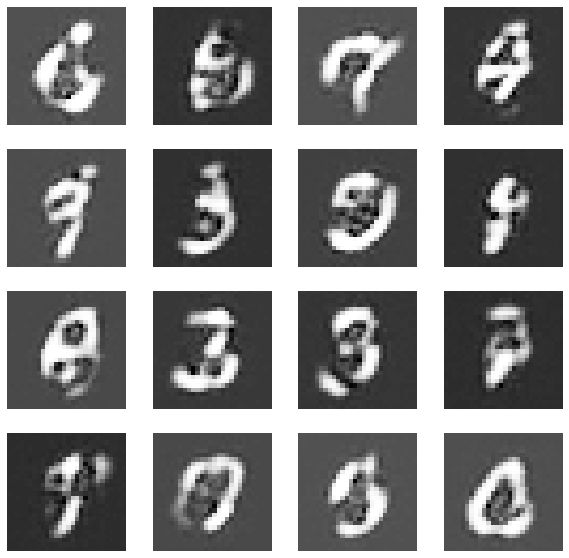

Epoch:  65


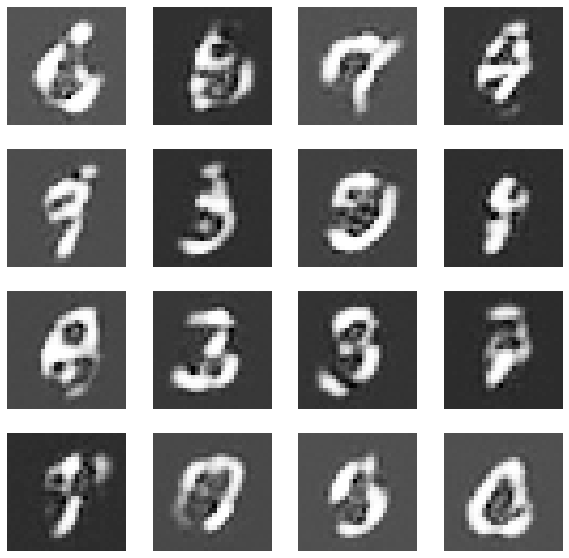

Epoch:  66


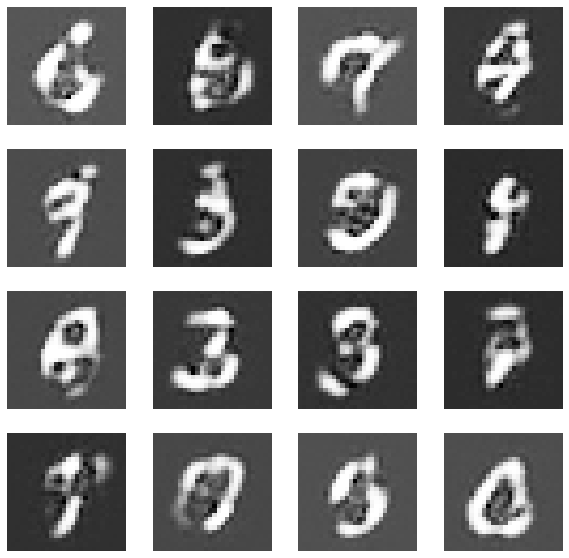

Epoch:  67


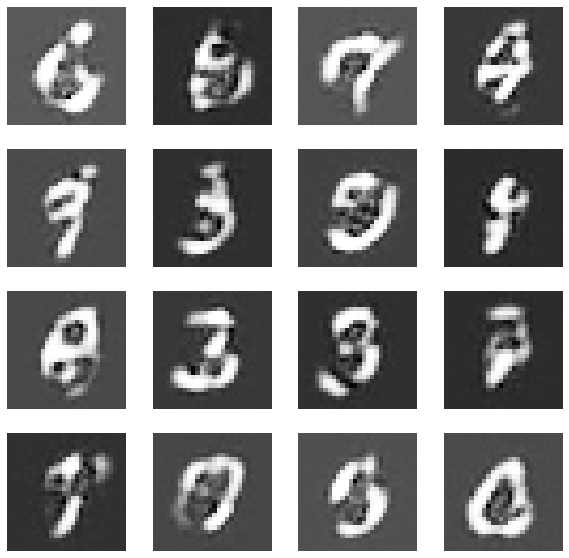

Epoch:  68


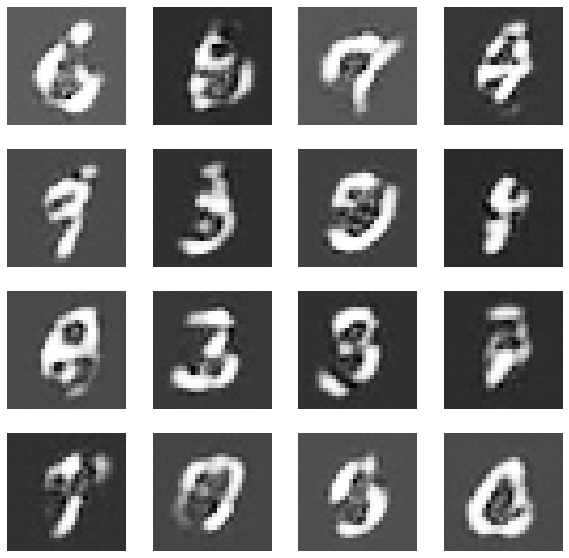

Epoch:  69


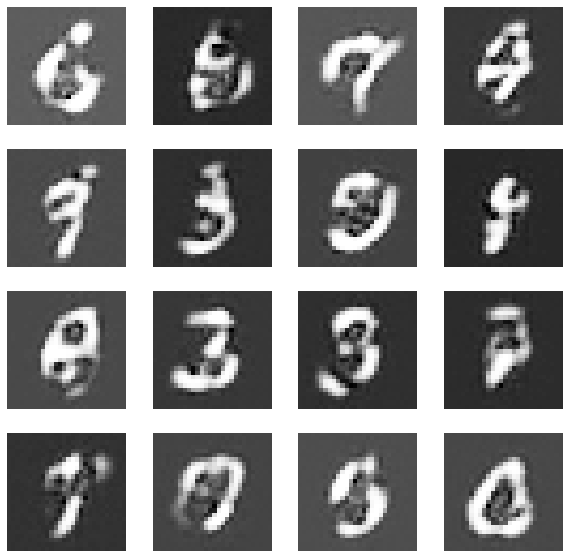

Epoch:  70


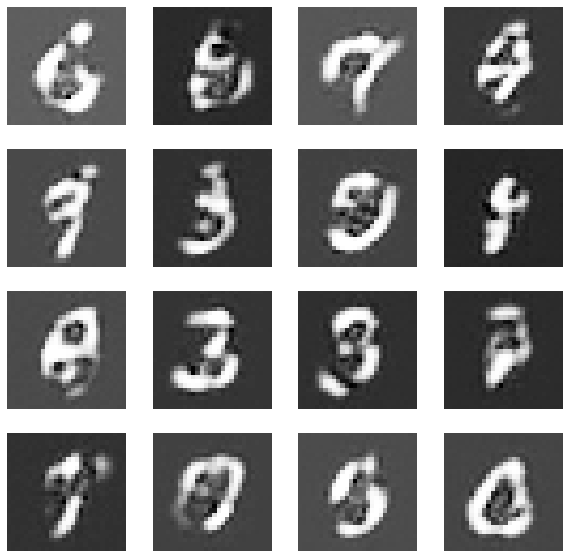

Epoch:  71


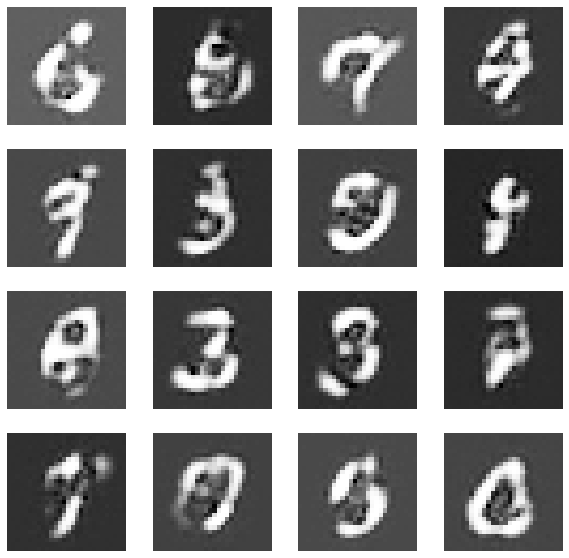

Epoch:  72


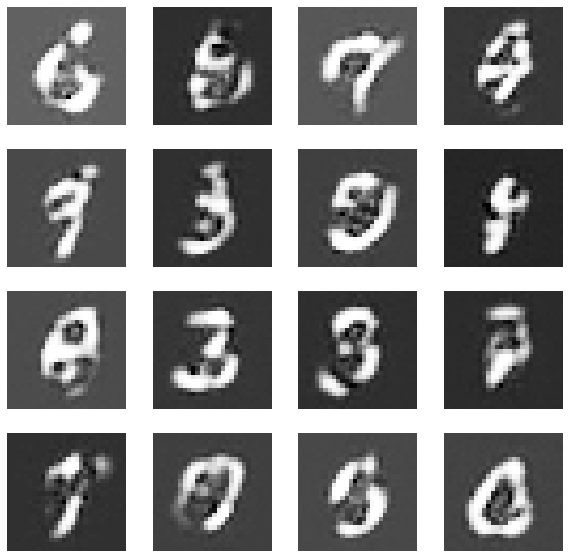

Epoch:  73


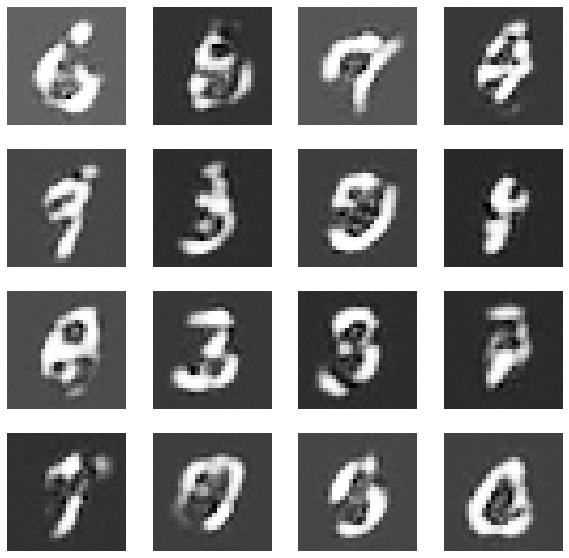

Epoch:  74


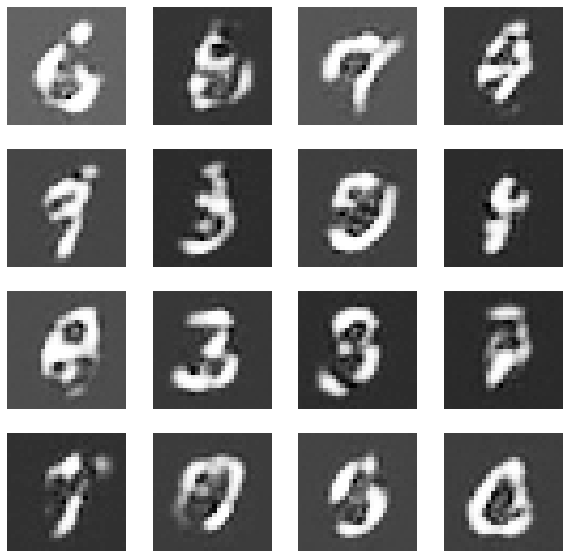

Epoch:  75


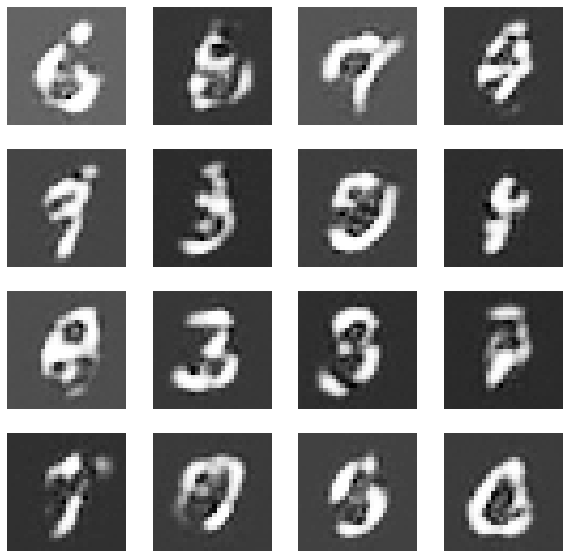

Epoch:  76


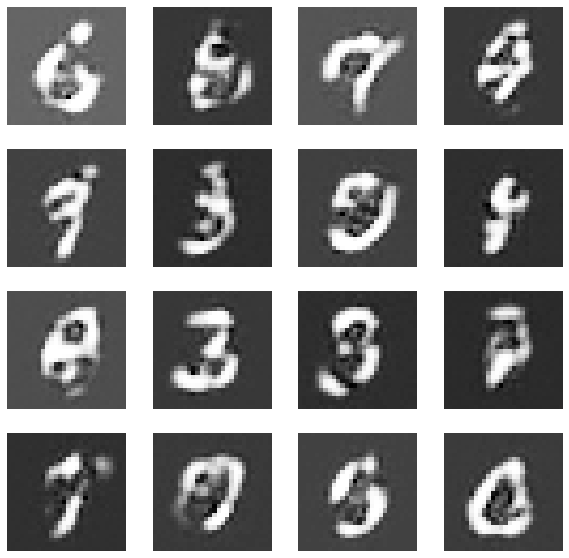

Epoch:  77


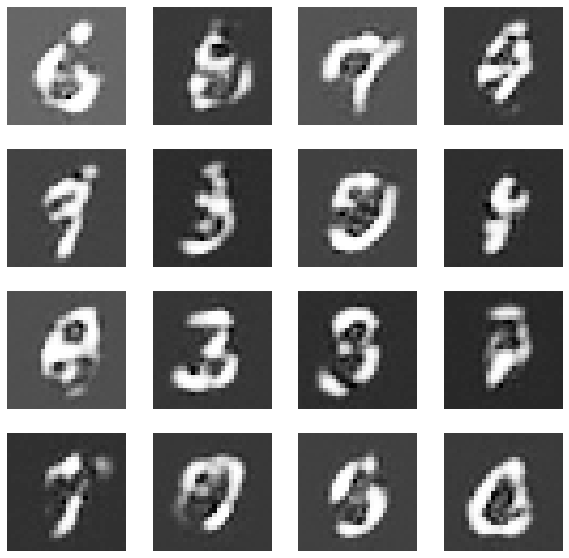

Epoch:  78


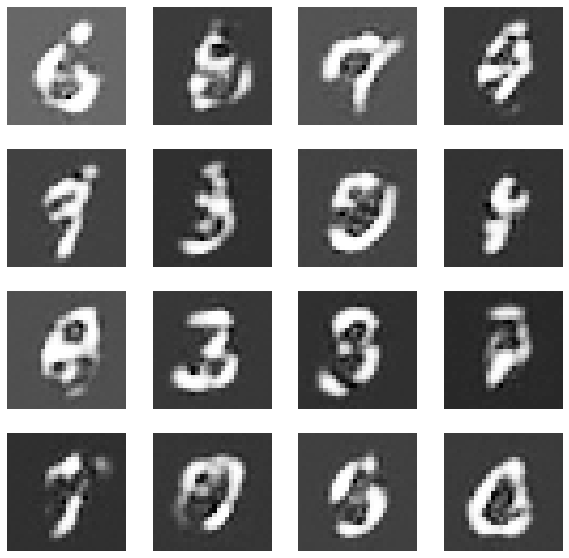

Epoch:  79


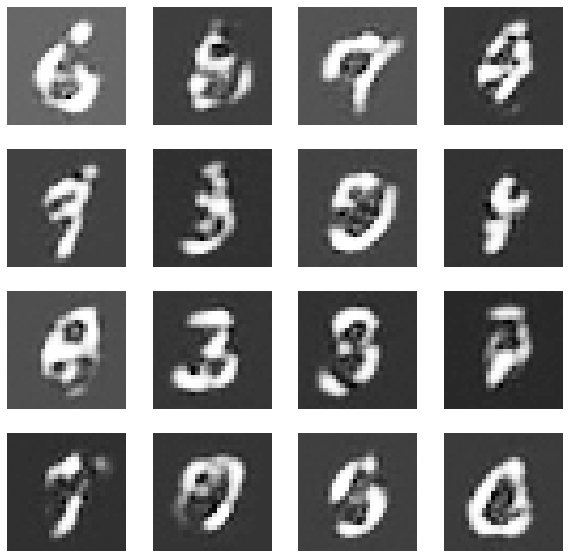

Epoch:  80


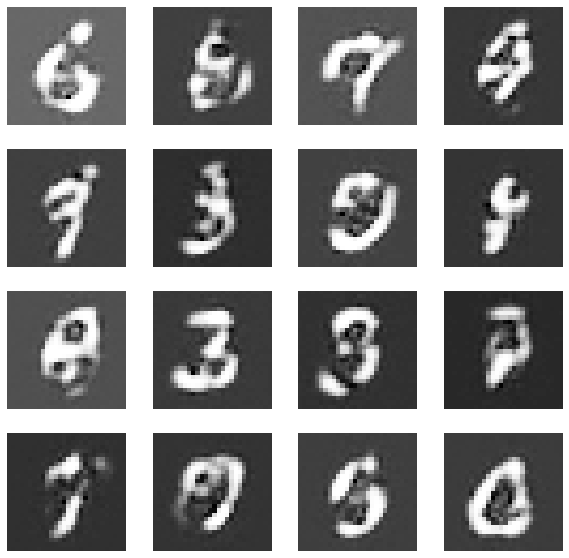

Epoch:  81


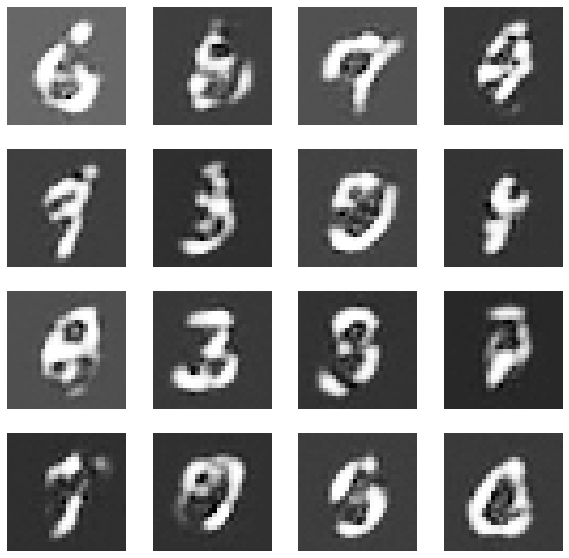

Epoch:  82


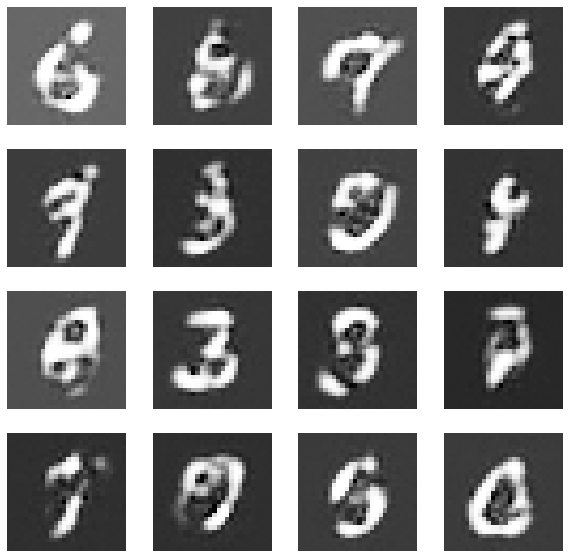

Epoch:  83


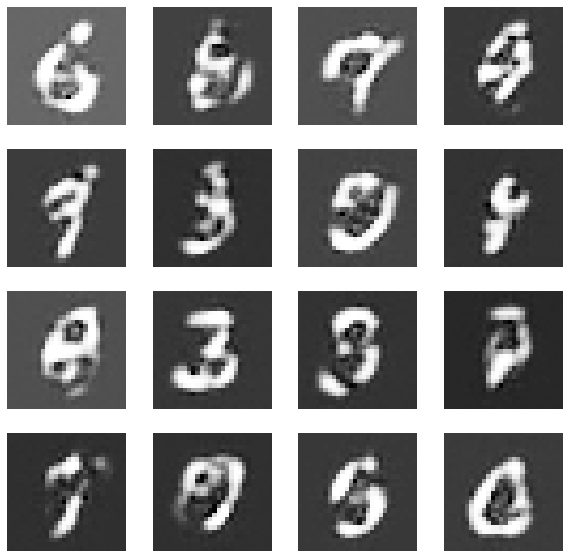

Epoch:  84


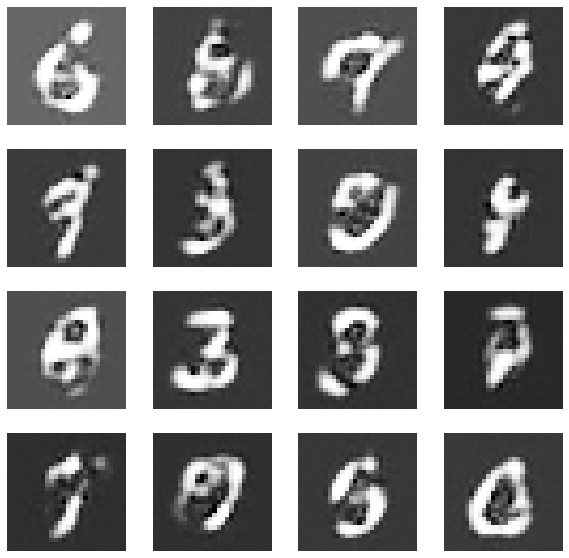

Epoch:  85


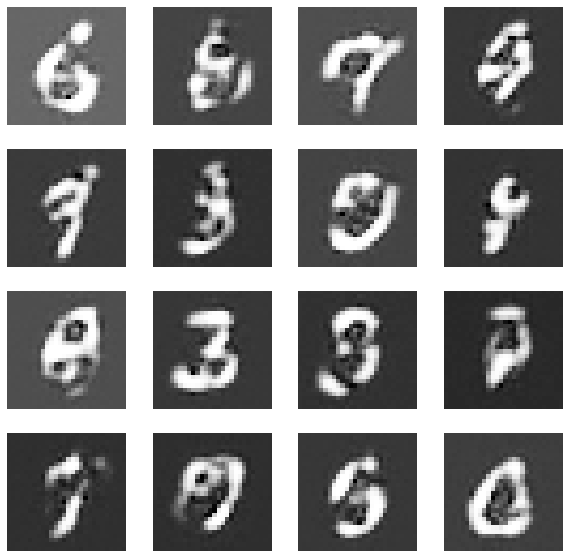

Epoch:  86


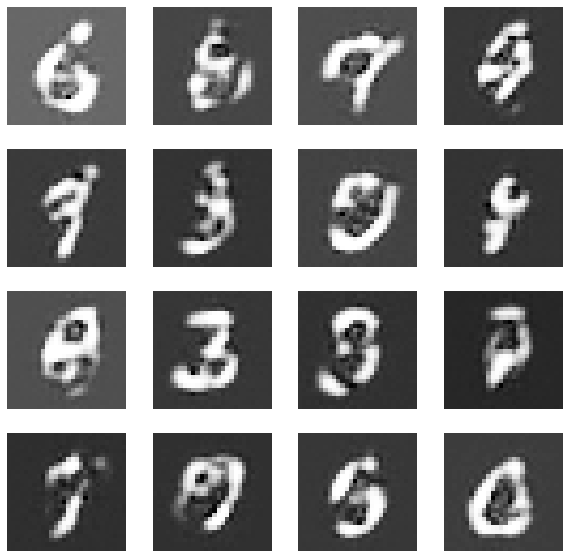

Epoch:  87


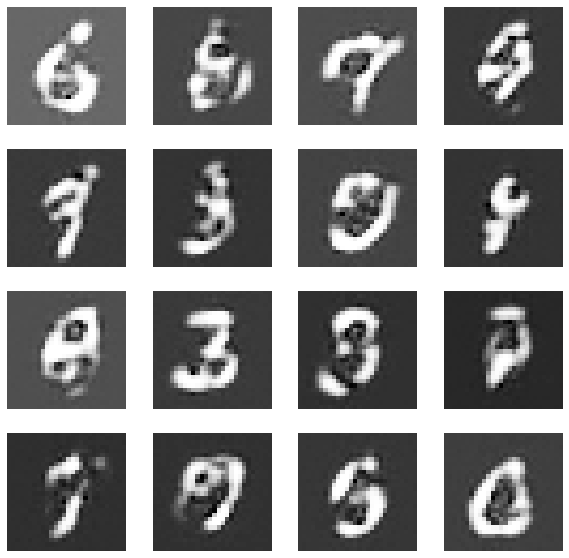

Epoch:  88


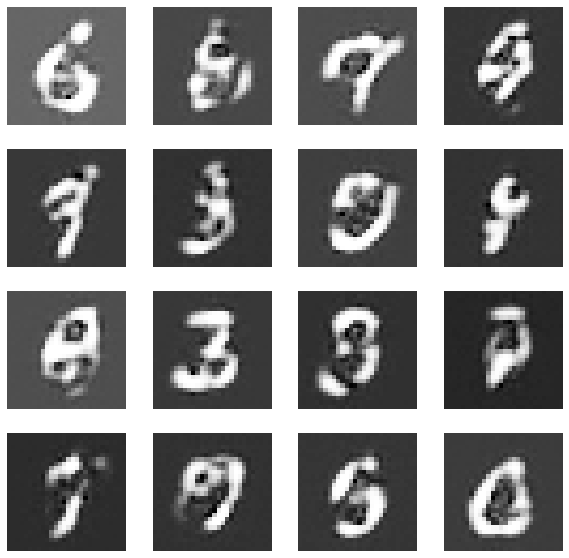

Epoch:  89


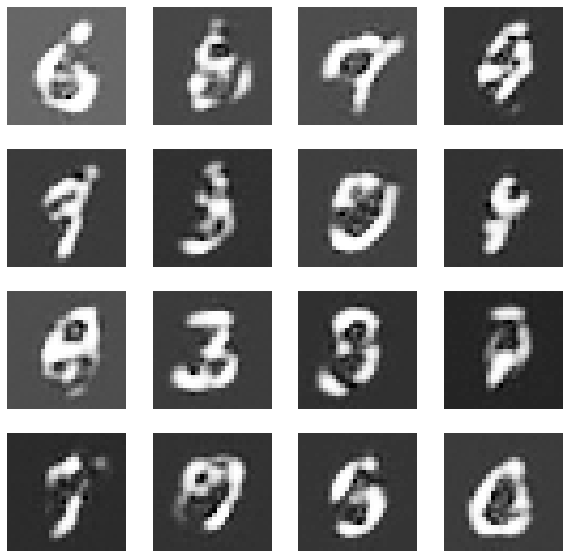

Epoch:  90


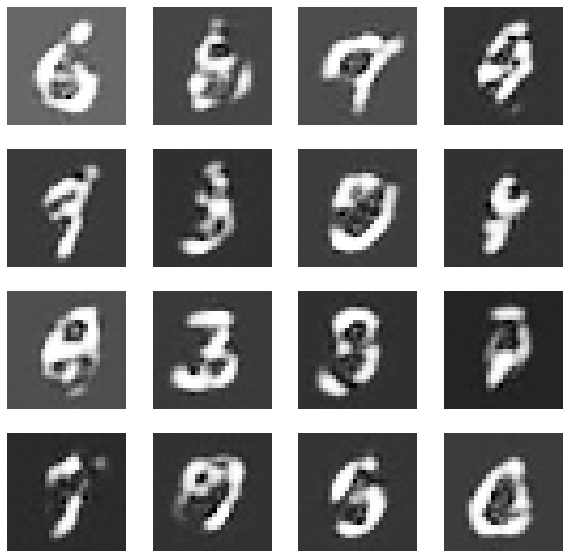

Epoch:  91


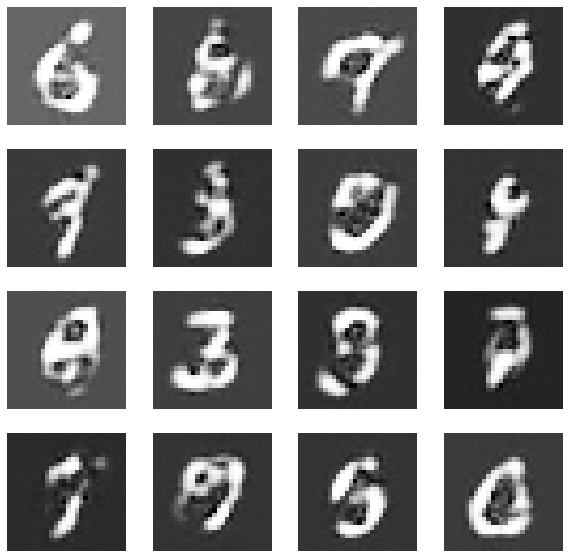

Epoch:  92


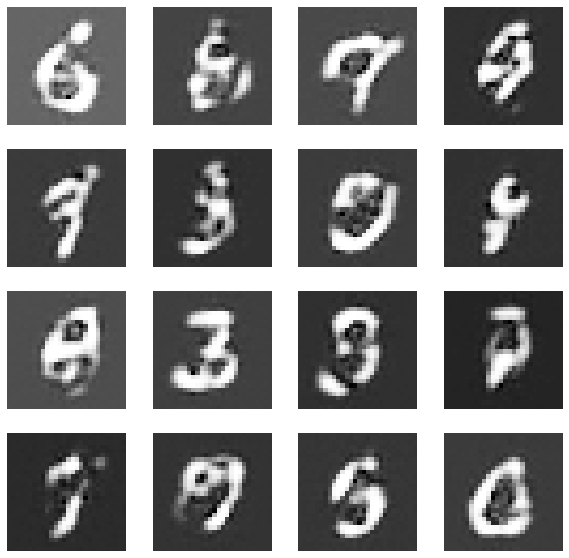

Epoch:  93


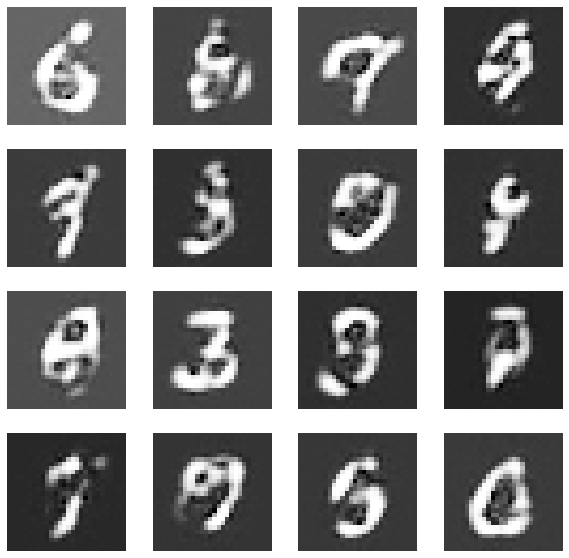

Epoch:  94


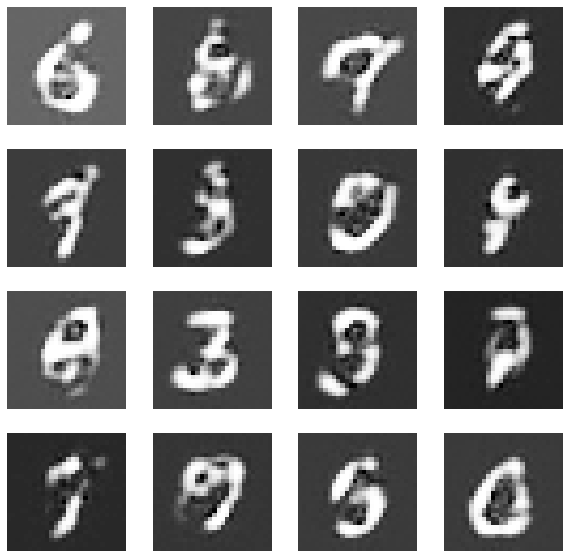

Epoch:  95


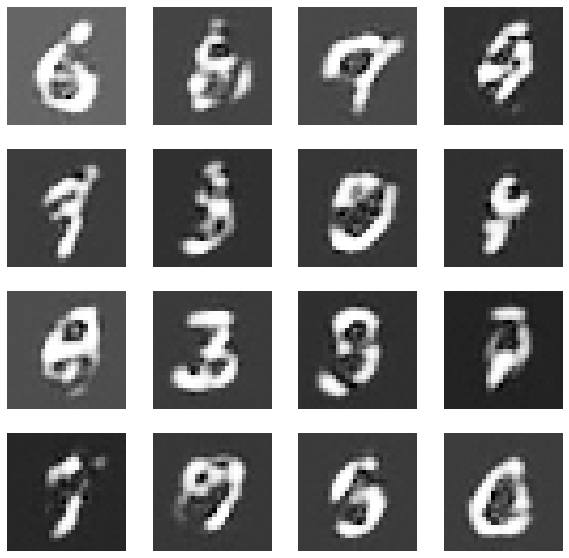

Epoch:  96


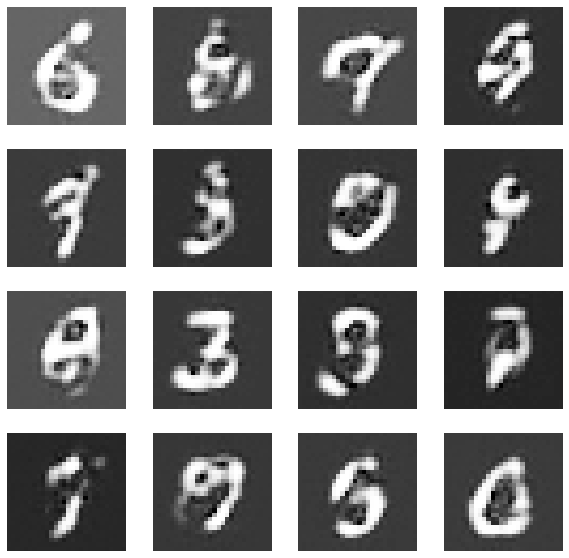

Epoch:  97


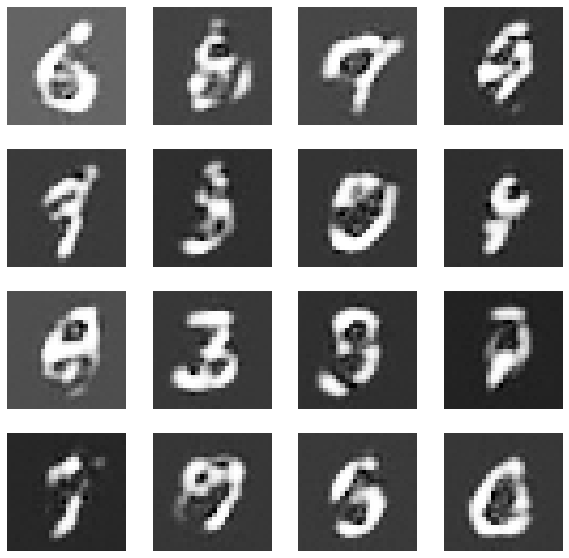

Epoch:  98


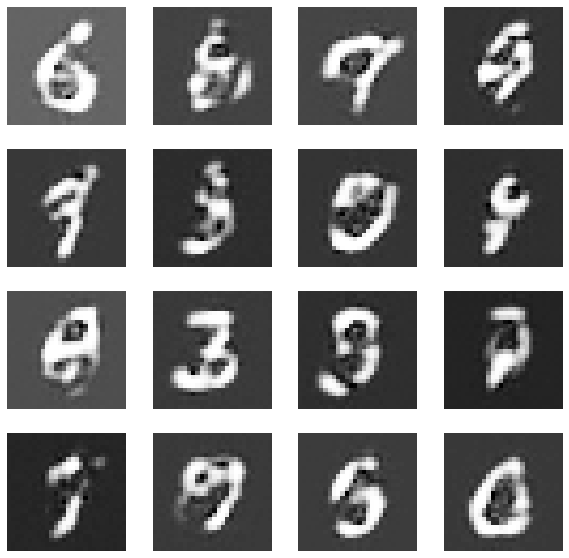

Epoch:  99


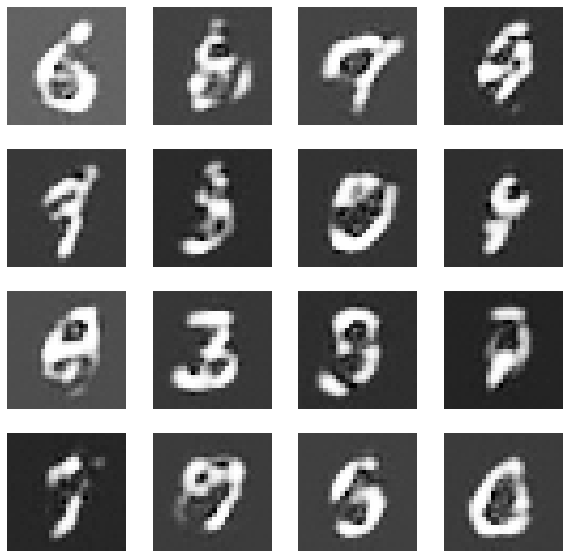

Epoch:  100


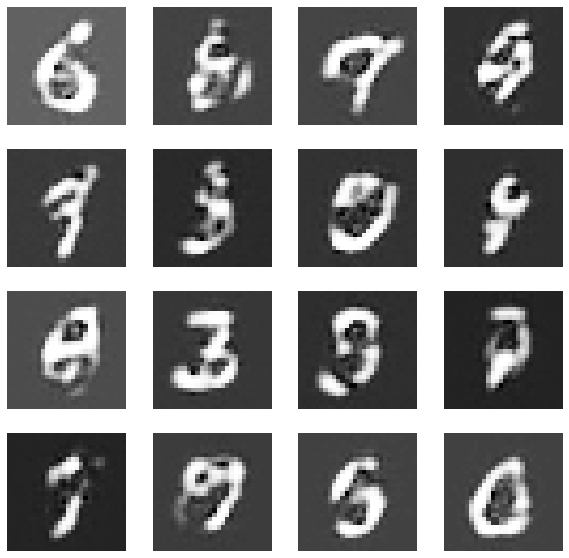

In [29]:
train(x_train, epochs, test_images)